**Abd. Malik A. Madinu**
--
Department of Geopysics and Meteorology - Mathematics and Natural Sciences IPB University


In [ ]:
import geemap
import ee

In [ ]:
import xee
import xarray as xr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00


In [ ]:
import ee
ee.Authenticate()
ee.Initialize(
    project='your project GEE',
    opt_url='https://earthengine-highvolume.googleapis.com')

In [ ]:
import geemap
from ipyleaflet import SearchControl

# Inisialisasi peta dunia (bebas)
map = geemap.Map(center=[0, 0], zoom=2)

# Tambahkan Search bar tanpa marker
search_control = SearchControl(
    position="topleft",
    url='https://nominatim.openstreetmap.org/search?format=json&q={s}',
    zoom=12,  # Zoom level saat lokasi ditemukan
    property_name='display_name',
    marker=None  # TANPA marker
)

# Tambahkan ke peta
map.add_control(search_control)

# Tampilkan peta
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          98.240326,
                          4.273833
                        ],
                        [
                          98.227282,
                          4.288897
                        ],
                        [
                          98.229342,
                          4.336826
                        ],
                        [
                          98.221104,
                          4.389544
                        ],
                        [
                          98.185407,
                          4.439521
                        ],
                        [
                          98.13598,
                          4.460058
                        ],
                        [
                          98.083808,
                          4.449789
                        ],
                        [
                          98.045365,
                          4.462796
                        ],
                        [
                          98.033695,
                          4.505238
                        ],
                        [
                          98.039873,
                          4.53741
                        ],
                        [
                          98.069392,
                          4.558629
                        ],
                        [
                          98.118818,
                          4.559998
                        ],
                        [
                          98.16138,
                          4.546308
                        ],
                        [
                          98.206688,
                          4.524404
                        ],
                        [
                          98.254742,
                          4.491547
                        ],
                        [
                          98.291812,
                          4.449105
                        ],
                        [
                          98.31172,
                          4.399814
                        ],
                        [
                          98.308287,
                          4.343673
                        ],
                        [
                          98.297303,
                          4.295744
                        ],
                        [
                          98.27259,
                          4.26904
                        ],
                        [
                          98.240326,
                          4.273833
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [ ]:
mangrove = ee.ImageCollection("LANDSAT/MANGROVE_FORESTS")

In [ ]:
single_image = mangrove.median().clip(roi)
map.addLayer(single_image, {}, 'mangrove')

In [ ]:
def mask_clouds_s2(image):
    scl = image.select('SCL')
    cloud_free = scl.neq(3).And(scl.neq(8)).And(scl.neq(9)).And(scl.neq(10))
    return image.updateMask(cloud_free)
def calculate_lst(image):
    lst = image.select('LST_Day_1km').multiply(0.02).subtract(273.15).rename('LST')
    qa = image.select('QC_Day')
    mask = qa.bitwiseAnd(3).eq(0)
    return lst.updateMask(mask).copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return ndvi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_evi(image):
    nir = image.select('B8')
    red = image.select('B4')
    blue = image.select('B2')
    evi = nir.subtract(red).multiply(2.5).divide(nir.add(red.multiply(6)).subtract(blue.multiply(7.5)).add(1)).rename('EVI')
    return evi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_savi(image):
    nir = image.select('B8')
    red = image.select('B4')
    savi = nir.subtract(red).multiply(1.5).divide(nir.add(red).add(0.5)).rename('SAVI')
    return savi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_ndre(image):
    ndre = image.normalizedDifference(['B8', 'B5']).rename('NDRE')
    return ndre.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_msavi(image):
    nir = image.select('B8')
    red = image.select('B4')
    msavi = nir.multiply(2).add(1).subtract(
        (nir.multiply(2).add(1)).pow(2).subtract(
            nir.subtract(red).multiply(8)
        ).sqrt ()
    ).divide(2).rename('MSAVI')
    return msavi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_ndmi(image):
    ndmi = image.normalizedDifference(['B8', 'B11']).rename('NDMI')
    return ndmi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_gndvi(image):
    gndvi = image.normalizedDifference(['B8', 'B3']).rename('GNDVI')
    return gndvi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_slavi(image):
    nir = image.select('B8')
    red = image.select('B4')
    swir2 = image.select('B12')
    slavi = nir.divide(red.add(swir2)).rename('SLAVI')
    return slavi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_lswi(image):
    lswi = image.normalizedDifference(['B8', 'B12']).rename('LSWI')
    return lswi.copyProperties(image, ['system:time_start', 'system:time_end'])
def calculate_vhi(ndvi_img, evi_img, savi_img,
                  ndre_img, msavi_img, ndmi_img,
                  gndvi_img, slavi_img, lswi_img,
                  lst_img):

    # Min dan max setiap indeks
    ndvi_min = ndvi_collection.select('NDVI').min()
    ndvi_max = ndvi_collection.select('NDVI').max()
    evi_min = evi_collection.select('EVI').min()
    evi_max = evi_collection.select('EVI').max()
    savi_min = savi_collection.select('SAVI').min()
    savi_max = savi_collection.select('SAVI').max()
    ndre_min = ndre_collection.select('NDRE').min()
    ndre_max = ndre_collection.select('NDRE').max()
    msavi_min = msavi_collection.select('MSAVI').min()
    msavi_max = msavi_collection.select('MSAVI').max()
    ndmi_min = ndmi_collection.select('NDMI').min()
    ndmi_max = ndmi_collection.select('NDMI').max()
    gndvi_min = gndvi_collection.select('GNDVI').min()
    gndvi_max = gndvi_collection.select('GNDVI').max()
    slavi_min = slavi_collection.select('SLAVI').min()
    slavi_max = slavi_collection.select('SLAVI').max()
    lswi_min = lswi_collection.select('LSWI').min()
    lswi_max = lswi_collection.select('LSWI').max()
    lst_min = lst_collection.select('LST').min()
    lst_max = lst_collection.select('LST').max()

    # VCI dan TCI
    vci_ndvi = ndvi_img.subtract(ndvi_min).divide(ndvi_max.subtract(ndvi_min)).multiply(100)
    vci_evi = evi_img.subtract(evi_min).divide(evi_max.subtract(evi_min)).multiply(100)
    vci_savi = savi_img.subtract(savi_min).divide(savi_max.subtract(savi_min)).multiply(100)
    vci_ndre = ndre_img.subtract(ndre_min).divide(ndre_max.subtract(ndre_min)).multiply(100)
    vci_msavi = msavi_img.subtract(msavi_min).divide(msavi_max.subtract(msavi_min)).multiply(100)
    vci_ndmi = ndmi_img.subtract(ndmi_min).divide(ndmi_max.subtract(ndmi_min)).multiply(100)
    vci_gndvi = gndvi_img.subtract(gndvi_min).divide(gndvi_max.subtract(gndvi_min)).multiply(100)
    vci_slavi = slavi_img.subtract(slavi_min).divide(slavi_max.subtract(slavi_min)).multiply(100)
    vci_lswi = lswi_img.subtract(lswi_min).divide(lswi_max.subtract(lswi_min)).multiply(100)
    tci = lst_max.subtract(lst_img).divide(lst_max.subtract(lst_min)).multiply(100)

    # VHI gabungan 10 indeks
    vhi = vci_ndvi.add(vci_evi).add(vci_savi).add(vci_ndre).add(vci_msavi).add(
        vci_ndmi).add(vci_gndvi).add(vci_slavi).add(vci_lswi).add(tci).divide(10).updateMask(single_image).rename('VHI')

    return vhi.copyProperties(ndvi_img, ['system:time_start', 'system:time_end'])


In [ ]:
s2_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
    .filterDate('2017-01-01', '2025-12-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
    .map(mask_clouds_s2)

ndvi_collection = s2_collection.map(calculate_ndvi)
evi_collection  = s2_collection.map(calculate_evi)
savi_collection = s2_collection.map(calculate_savi)
ndre_collection = s2_collection.map(calculate_ndre)
msavi_collection = s2_collection.map(calculate_msavi)
ndmi_collection = s2_collection.map(calculate_ndmi)
gndvi_collection = s2_collection.map(calculate_gndvi)
slavi_collection = s2_collection.map(calculate_slavi)
lswi_collection = s2_collection.map(calculate_lswi)

lst_collection = ee.ImageCollection("MODIS/061/MOD11A2") \
    .filterDate('2017-01-01', '2025-12-31') \
    .map(calculate_lst)

In [ ]:

# 2019
median_ndvi2019 = ndvi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_evi2019 = evi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_savi2019 = savi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_ndre2019 = ndre_collection.filterDate('2019-01-01', '2019-12-31').median()
median_msavi2019 = msavi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_ndmi2019 = ndmi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_gndvi2019 = gndvi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_slavi2019 = slavi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_lswi2019 = lswi_collection.filterDate('2019-01-01', '2019-12-31').median()
median_lst2019 = lst_collection.filterDate('2019-01-01', '2019-12-31').median()

# 2020
median_ndvi2020 = ndvi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_evi2020 = evi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_savi2020 = savi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_ndre2020 = ndre_collection.filterDate('2020-01-01', '2020-12-31').median()
median_msavi2020 = msavi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_ndmi2020 = ndmi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_gndvi2020 = gndvi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_slavi2020 = slavi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_lswi2020 = lswi_collection.filterDate('2020-01-01', '2020-12-31').median()
median_lst2020 = lst_collection.filterDate('2020-01-01', '2020-12-31').median()

# 2021
median_ndvi2021 = ndvi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_evi2021 = evi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_savi2021 = savi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_ndre2021 = ndre_collection.filterDate('2021-01-01', '2021-12-31').median()
median_msavi2021 = msavi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_ndmi2021 = ndmi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_gndvi2021 = gndvi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_slavi2021 = slavi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_lswi2021 = lswi_collection.filterDate('2021-01-01', '2021-12-31').median()
median_lst2021 = lst_collection.filterDate('2021-01-01', '2021-12-31').median()

# 2022
median_ndvi2022 = ndvi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_evi2022 = evi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_savi2022 = savi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_ndre2022 = ndre_collection.filterDate('2022-01-01', '2022-12-31').median()
median_msavi2022 = msavi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_ndmi2022 = ndmi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_gndvi2022 = gndvi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_slavi2022 = slavi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_lswi2022 = lswi_collection.filterDate('2022-01-01', '2022-12-31').median()
median_lst2022 = lst_collection.filterDate('2022-01-01', '2022-12-31').median()

# 2023
median_ndvi2023 = ndvi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_evi2023 = evi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_savi2023 = savi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_ndre2023 = ndre_collection.filterDate('2023-01-01', '2023-12-31').median()
median_msavi2023 = msavi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_ndmi2023 = ndmi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_gndvi2023 = gndvi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_slavi2023 = slavi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_lswi2023 = lswi_collection.filterDate('2023-01-01', '2023-12-31').median()
median_lst2023 = lst_collection.filterDate('2023-01-01', '2023-12-31').median()

# 2024
median_ndvi2024 = ndvi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_evi2024 = evi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_savi2024 = savi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_ndre2024 = ndre_collection.filterDate('2024-01-01', '2024-12-31').median()
median_msavi2024 = msavi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_ndmi2024 = ndmi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_gndvi2024 = gndvi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_slavi2024 = slavi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_lswi2024 = lswi_collection.filterDate('2024-01-01', '2024-12-31').median()
median_lst2024 = lst_collection.filterDate('2024-01-01', '2024-12-31').median()

In [ ]:
def image_with_date(image, date_str):
    return image.set('system:time_start', ee.Date(date_str).millis())

vhi_image2019 = image_with_date(
    calculate_vhi(median_ndvi2019, median_evi2019, median_savi2019,
                  median_ndre2019, median_msavi2019, median_ndmi2019,
                  median_gndvi2019, median_slavi2019, median_lswi2019,
                  median_lst2019),
    '2019-12-31')

vhi_image2020 = image_with_date(
    calculate_vhi(median_ndvi2020, median_evi2020, median_savi2020,
                  median_ndre2020, median_msavi2020, median_ndmi2020,
                  median_gndvi2020, median_slavi2020, median_lswi2020,
                  median_lst2020),
    '2020-12-31')

vhi_image2021 = image_with_date(
    calculate_vhi(median_ndvi2021, median_evi2021, median_savi2021,
                  median_ndre2021, median_msavi2021, median_ndmi2021,
                  median_gndvi2021, median_slavi2021, median_lswi2021,
                  median_lst2021),
    '2021-12-31')

vhi_image2022 = image_with_date(
    calculate_vhi(median_ndvi2022, median_evi2022, median_savi2022,
                  median_ndre2022, median_msavi2022, median_ndmi2022,
                  median_gndvi2022, median_slavi2022, median_lswi2022,
                  median_lst2022),
    '2022-12-31')

vhi_image2023 = image_with_date(
    calculate_vhi(median_ndvi2023, median_evi2023, median_savi2023,
                  median_ndre2023, median_msavi2023, median_ndmi2023,
                  median_gndvi2023, median_slavi2023, median_lswi2023,
                  median_lst2023),
    '2023-12-31')

vhi_image2024 = image_with_date(
    calculate_vhi(median_ndvi2024, median_evi2024, median_savi2024,
                  median_ndre2024, median_msavi2024, median_ndmi2024,
                  median_gndvi2024, median_slavi2024, median_lswi2024,
                  median_lst2024),
    '2024-12-31')

ts_collection = ee.ImageCollection([
    vhi_image2019,
    vhi_image2020, vhi_image2021,
    vhi_image2022, vhi_image2023,
    vhi_image2024
])

# Klip dengan ROI jika perlu
aa = ts_collection.map(lambda img: img.clip(roi))

ts_collection

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_dataset(aa, engine = 'ee', crs = 'EPSG:4326', scale = 0.0001, geometry = roi )
ds

<xarray.Dataset> Size: 194MB
Dimensions:  (time: 6, lon: 2780, lat: 2910)
Coordinates:
  * time     (time) datetime64[ns] 48B 2019-12-31 2020-12-31 ... 2024-12-31
  * lon      (lon) float64 22kB 98.03 98.03 98.03 98.03 ... 98.31 98.31 98.31
  * lat      (lat) float64 23kB 4.269 4.269 4.269 4.269 ... 4.56 4.56 4.56 4.56
Data variables:
    VHI      (time, lon, lat) float32 194MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
#ds['VHI'].plot(x = 'lon', y = 'lat', cmap = 'RdYlGn', col = 'time', col_wrap = 3, robust =True )

KeyboardInterrupt: 

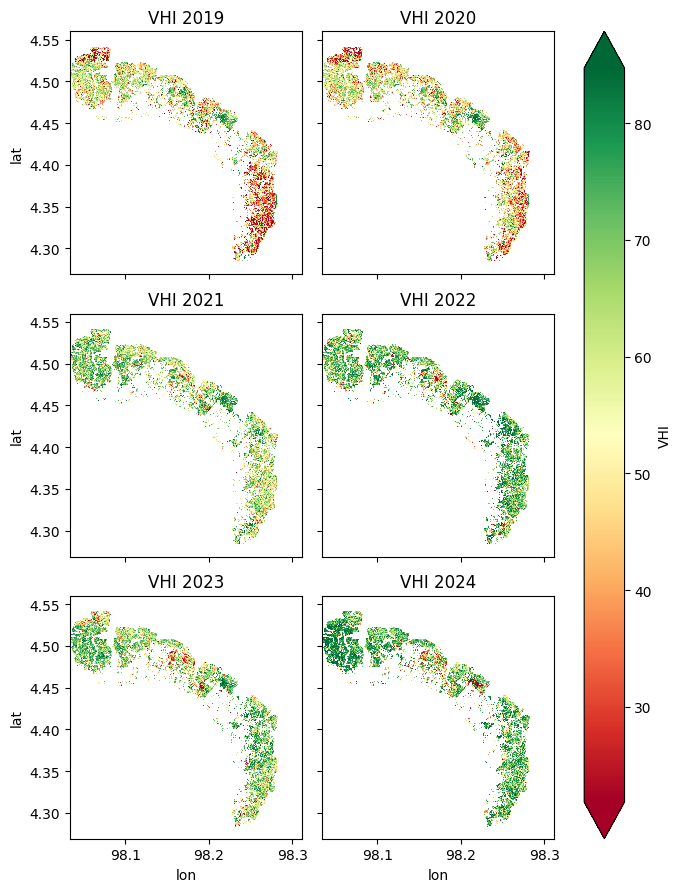

In [ ]:
vhi_array = ds['VHI'].values
lon = ds['VHI'].coords['lon'].values  # panjang 135
lat = ds['VHI'].coords['lat'].values  # panjang 123

tahun_labels = ["VHI 2019", "VHI 2020",
				        "VHI 2021", "VHI 2022", "VHI 2023",
                "VHI 2024"]
ds_label = xr.DataArray(
    data=vhi_array,
    coords={'time': tahun_labels, 'lon': lon, 'lat': lat},
    dims=['time', 'lon', 'lat'],
    name='VHI'
)

g = ds_label.plot(
    x='lon', y='lat',
    col='time', col_wrap=2,
    cmap='RdYlGn', robust=True,
    add_colorbar=True
)

for ax, label in zip(g.axes.flat, tahun_labels):
    ax.set_title(label)

In [ ]:
plt.savefig("data.png", dpi=600, bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
ds = xr.open_dataset(aa, engine='ee', crs='EPSG:4326', scale=0.0001, geometry=roi)
ds

<xarray.Dataset> Size: 110MB
Dimensions:  (time: 8, lon: 1984, lat: 1737)
Coordinates:
  * time     (time) datetime64[ns] 64B 2018-12-31 2019-12-31 ... 2025-06-01
  * lon      (lon) float64 16kB 98.49 98.49 98.49 98.49 ... 98.69 98.69 98.69
  * lat      (lat) float64 14kB 3.855 3.855 3.855 3.855 ... 4.028 4.028 4.028
Data variables:
    VHI      (time, lon, lat) float32 110MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
# Ambil data VHI dan sesuaikan urutan dimensi
vhi = ds['VHI'].transpose('time', 'lat', 'lon')

# Ambil dimensi
time_len = vhi.sizes['time']
lat_len = vhi.sizes['lat']
lon_len = vhi.sizes['lon']

In [ ]:
# Untuk menyimpan hasil clustering tiap waktu
clustered_results = []

In [ ]:
for t in range(time_len):
    # Ambil data waktu ke-t (lat, lon)
    data_2d = vhi[t].values  # (1346, 1716)

    # Reshape ke (n_pixel, 1)
    flat_data = data_2d.reshape(-1, 1)

    # Imputasi NaN dengan nilai rata-rata
    imputer = SimpleImputer(strategy='mean')
    imputed_data = imputer.fit_transform(flat_data)

    # Normalisasi
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(imputed_data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Reshape kembali ke (lat, lon)
    clustered_map = labels.reshape(lat_len, lon_len)
    clustered_results.append(clustered_map)